<a href="https://colab.research.google.com/github/sammatuba/AI-NLP-Codecamp/blob/master/Sentiment_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords

import nltk
import random

In [2]:
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
stopwords = stopwords.words("english")

In [4]:
print(movie_reviews.categories())

['neg', 'pos']


In [0]:
reviews = []
for label in movie_reviews.categories():
  for revId in movie_reviews.fileids(label):
    reviews.append((list(movie_reviews.words(revId)), label))

In [13]:
print(reviews[0])

(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'b

In [18]:
# remove punctuation

for review in reviews[:5]:
  text = review[0]
  label = review[1]

neg
neg
neg
neg
neg


In [0]:
stopwords = 

In [0]:
allowed_tag = ['N','J']
allwords = []
finalData = []

for review in reviews:
  text = review[0]
  label = review[1]
  text_tags = nltk.pos_tag(text)
  
  """
  # remove non-alphanumeric characters
  text = ''.join([i for i in text if not i.isalpha()])
  
  # tokenize text
  text = nltk.word_tokenize(text)
  
  # remove stopwords
  text = [word for word in text if not in stopwords]
  
  """
  
  for word, tag in text_tags:
    if tag in allowed_tag and word.isalpha() and len(word)>0:
      filteredText.append(word.lower())
      
  finalData.append((filteredText, label))

In [0]:
# generate bigram  

def toBigram(data):
  """
  this function converts a data of unigrams (with labels) into bigrams
  """
  data_bigram = []

  for review, label in data:
    review_bigram = list((nltk.bigrams(review)))
    review_bigram = list(map(' '.join, review_bigram))

    data_bigram.append((review_bigram,label))
    
  return data_bigram

In [0]:
finalData_bigram = toBigram(finalData)

In [0]:
allwords = nltk.FreqDist(allwords)

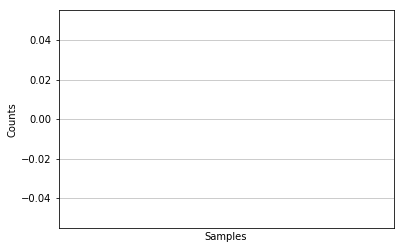

In [83]:
allwords.plot(10)

In [0]:
wordFeatures = (list(allwords.keys()))[:2000]

In [0]:
def getVectors(wordFeatures, document):
  features = {}
  for w in wordFeatures:
    features[w] = (w in document)
    
  return features

In [0]:
featuresets = [(getVectors(wordFeatures, rev), label) for (rev, label) in finalData]
random.shuffle(featuresets)

In [0]:
print(len(featuresets[0][0]))

In [0]:
print(featuresets[:1])

In [0]:
train_data = featuresets[:1500]
test_data = featuresets[1500:]

In [0]:
classifier = NaiveBayesClassifier.train(train_data)

In [0]:
accuracy = nltk.classify.accuracy(classifier, test_data)*100

In [0]:
comment = " I like the movie. It's thrilling and worth watching"

In [0]:
print(accuracy)

In [0]:
classification = classifier.classify((getVectors(wordFeatures, comment)))

In [0]:
print(classification)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split

In [0]:
reviews = []
labels = []

for label in movie_reviews.categories():
  for revId in movie_reviews.fileids(label):
    reviews.append(' '.join(list(movie_reviews.words(revId))))
    labels.append(label)

In [0]:
print(reviews[0])

In [0]:
model_mulNB = Pipeline([('vect', CountVectorizer(ngram_range=(2, 4),
                                                stop_words='english',
                                                lowercase=True)),
                       ('tfidf', TfidfTransformer()),
                       ('Multinomial', MultinomialNB())])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.3, random_state=0)

In [0]:
cv = CountVectorizer()
trainVectors = cv.fit_transform(X_train)

In [0]:
a = trainVectors.toarray()

In [0]:
a

In [0]:
model_mulNB.fit(X_train, y_train)

In [0]:
classification = model_mulNB.predict([comment])

In [0]:
classification

In [0]:
from nltk.classify import SklearnClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [0]:
model_mulNB = model_mulNB = Pipeline([('tfidf', TfidfTransformer()),
                                      ('chi', SelectKBest(chi2, k=1000)),
                                       ('Multinomial', MultinomialNB())])

In [0]:
classifier = SklearnClassifier(model_mulNB)

In [0]:
classifier.train(train_data)

In [0]:
accuracy = nltk.classify.accuracy(classifier, test_data)*100

In [0]:
accuracy

In [0]:
classification = classifier.classify((getVectors(wordFeatures, comment)))

In [0]:
classification